# King County Home Remodeling

Author: James Stipanowich

![image.png](Images/kingcounty.jpg)

## Project Overview

Every year homes are bought and sold in the Washington state area. Seattle, the largest city in Washington state, belongs to a county named King County. The buying and selling of houses occurs every year in King County. The housing price values are recorded and vary over many thousands and millions of dollars. The worth of a house may depend on many different factors including square footage, number of bedrooms, number of bathrooms, and number of floors of a home. Regression modeling is implemented to analyze house sales in King County and inform a home seller how to sell a home for the greatest net worth possible.

## Business Problem

In this housing project, I am acting with a real estate agency in the King County area of Washington state. The real estate agency wants to help homeowners determine the best ways to improve their homes and enhance the estimated value of their homes in preparation for putting them on the market to be sold. I plan to help homeowners come up with the best ideas for home renovations to increase the worth of their homes and allow homeowners to sell their homes for the highest monetary value possible.

### The Data

This project uses the King County House Sales dataset, which can be found in  `kc_house_data.csv` in the data folder in this repository. The description of the column names can be found in `column_names.md` in the same folder. The dataset covers house sale prices between May 2014 and May 2015 in King County of Washington state.

I decided what data from this dataset to use and how to use it. 


## Data Preparation

Factors that influence how well a house might sell in King County include square footage, number of bedrooms, number of bathrooms, and number of floors of a home. I used these specific home aspects from the King County House Sales dataset because they are all variables that can be realistically constructed or deconstructed in order to improve the selling price of a home.

I imported the following libraries and the dataset to start my data analyses processes.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('Data/kc_house_data.csv')

The following code provides the first five lines of the dataset.

In [61]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Another code shows information on all the columns within the King County House Sales dataset that could be used for the project and the number of values in each column.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


I looked at the correlation between home sale price and the various King County House Sales columns in the code below.

In [63]:
df.corr().price.sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

Some of the features I plan to compare to home sale price in my project are listed below. The next codes show that there are mostly 3 bedroom, 2.5 bathroom, and single floor homes in the dataset. Also, the codes provide the general dispersion of numeric values of the data in these columns.

In [64]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [65]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [66]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

I generated a couple of different codes and plots to display the general correlations between square footage, number of bedrooms, number of bathrooms, and number of floors of a home and home sale price.  These help to provide a basic understanding of the relationship between the variables I chose for this project in congruence with one another and with home sale price.

In [67]:
used_cols_2 = [c for c in df.columns.to_list() if c in ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']]

In [68]:
z= df[used_cols_2]

In [69]:
z.corr()

,price,bedrooms,bathrooms,sqft_living,floors
price,1.000000,0.308787,0.525906,0.701917,0.256804
bedrooms,0.308787,1.000000,0.514508,0.578212,0.177944
bathrooms,0.525906,0.514508,1.000000,0.755758,0.502582
sqft_living,0.701917,0.578212,0.755758,1.000000,0.353953
floors,0.256804,0.177944,0.502582,0.353953,1.000000


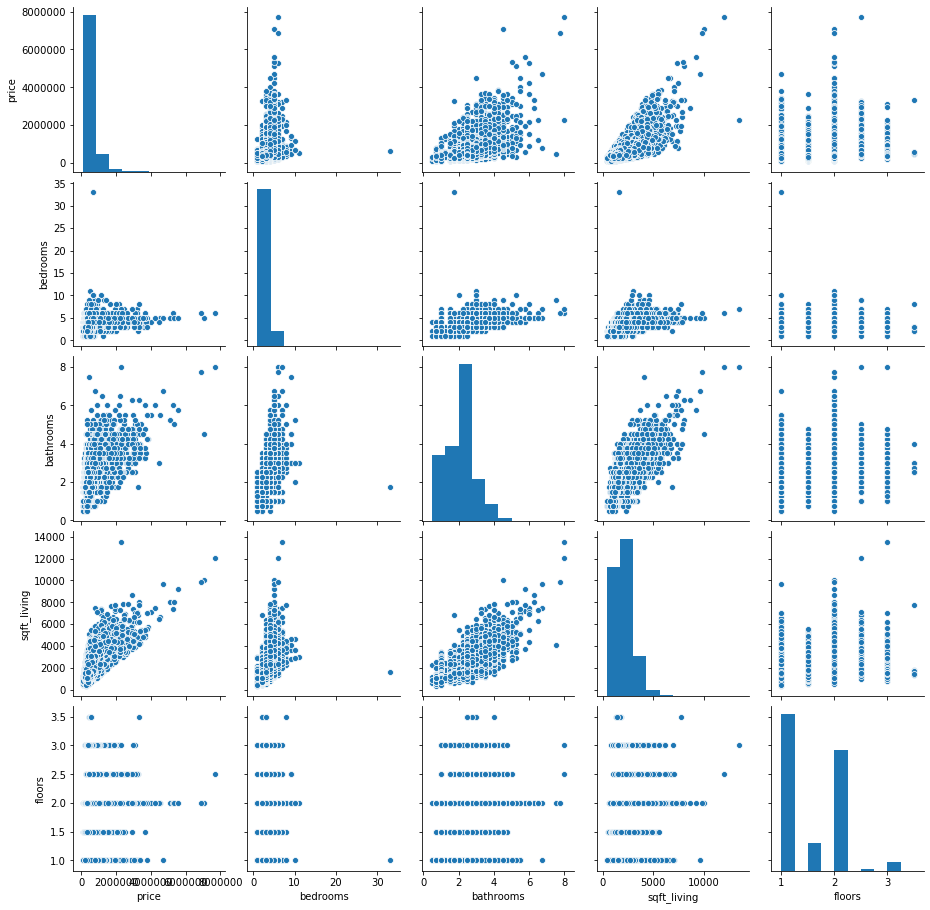

In [70]:
sns.pairplot(z)

I created graphs of the relationships between the attributes of homes in King County and the sale prices of these homes in King County to connect how home sale price and the various attributes affect one another. The graphs are shown below:

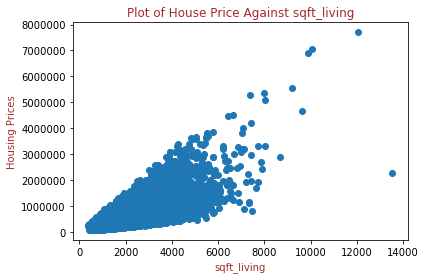

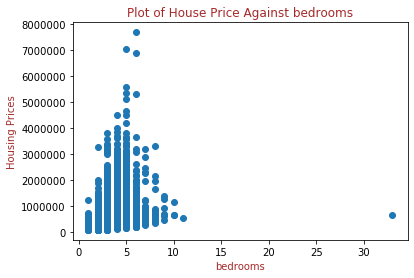

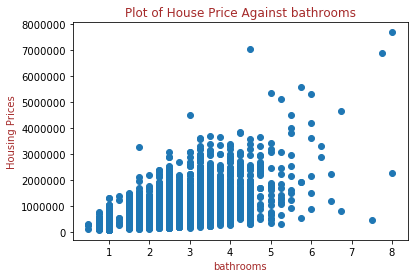

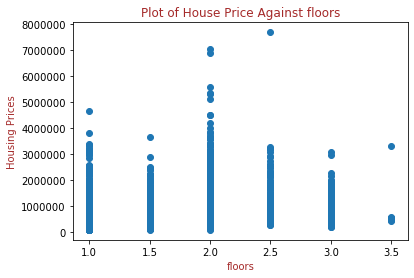

In [71]:
features= ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
for x in features:
    plt.scatter(df[x], df['price'])
    plt.title(f'Plot of House Price Against {x}', color= 'brown')
    plt.xlabel(x, color= 'brown')
    plt.ylabel('Housing Prices', color= 'brown')
    plt.show()

The graphs showed the relationships between these various features of a home and home sale price on different scales. Each of these home variables links with the home sale price in a unique way. Also, I have a graph of home sale price plotted against itself to show the straight 1:1 ratio line that is produced.

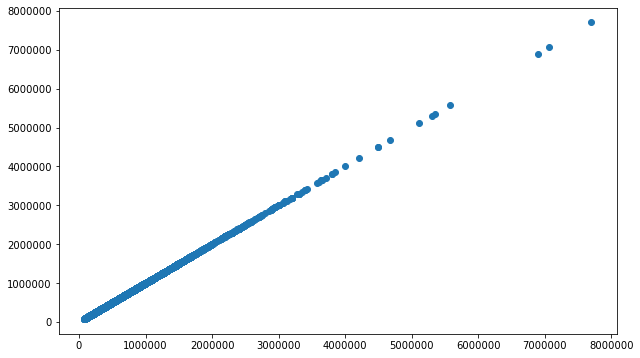

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['price'])

## Data Modeling

In order to take into account square footage, number of bedrooms, number of bathrooms, and number of floors of a home on a collective scale with a more specified affiliation with home sale price, I created a model including all of these aspects of home sales and compared the various model features with home selling price.

In [73]:
X2= df[features]
y2= df['price']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2, test_size= 0.25, random_state= 42)

In [75]:
scaler= StandardScaler()
scaler.fit(X2_train)
X2_train_scaled= scaler.transform(X2_train)
X2_test_scaled= scaler.transform(X2_test)

In [76]:
lr= LinearRegression()
lr.fit(X2_train_scaled, y2_train)

LinearRegression()

In [77]:
train2_preds= lr.predict(X2_train_scaled)
test2_preds= lr.predict(X2_test_scaled)

In [78]:
r2_score(y2_train, train2_preds)

0.5050736458304532

In [79]:
r2_score(y2_test, test2_preds)

0.5122033625979647

In [80]:
print(f"MSE train: {mean_squared_error(y2_train, train2_preds)}")

MSE train: 66419210673.11993


In [81]:
print(f"MSE test: {mean_squared_error(y2_test, test2_preds)}")

MSE test: 66925557434.19048


In [82]:
print(f"RMSE train: {np.sqrt(mean_squared_error(y2_train, train2_preds))}")

RMSE train: 257719.24777385162


In [83]:
print(f"RMSE test: {np.sqrt(mean_squared_error(y2_test, test2_preds))}")

RMSE test: 258699.74378454743


In [84]:
dict(zip(X2.columns, lr.coef_))

{'sqft_living': 283128.64296512806,
 'bedrooms': -55432.11562724108,
 'bathrooms': 8187.876691374367,
 'floors': 529.480545450026}

In [85]:
lr.intercept_

541284.4615669568

In [86]:
residuals_train2= y2_train- train2_preds
residuals_test2= y2_test- test2_preds

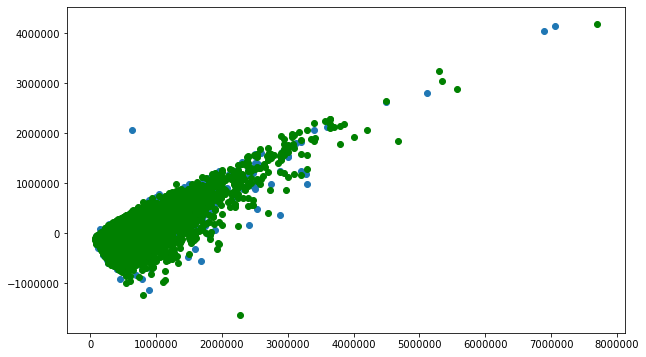

In [87]:
plt.figure(figsize= (10,6))
plt.scatter(y2_test, residuals_test2)
plt.scatter(y2_train, residuals_train2, color= 'green')

My initial model used square footage, number of bedrooms, number of bathrooms, and number of floors of a home as they existed unchanged in the dataset and ended up with a .52 test R2 score (medium amount of variation in the data). Square footage, number of bedrooms, number of bathrooms, and number of floors of a home all had very different relationships with the sale price of a home. My baseline model included a lot of outlier data that may have strongly skewed the relationships between the various features of square footage, number of bedrooms, number of bathrooms, and number of floors of a home and home selling price. 

The initial model had linear coefficients for my features of 283128.64 for square footage, -55432.11 for bedrooms, 8187.87 for bathrooms, and 529.48 for floors.  These coefficients exhibit that square footage had the strongest positive relationship with home sale price of the features. Number of bedrooms had a negative relationship with home sale price. Number of floors and number of bathrooms both had minor positive relationships with home sale price. The first model test set had an root mean squared error value of 258699.74, which means my model could be about 258699.74 dollars off of my target home selling price. My residuals plot of the initial model shows the test and training values for my model are about the same.

I decided to create a second model that mitigated the outlier data. I changed the number of bedrooms and bathrooms per house to less than or equal to 6. This data represents mostly single family households. I altered the number of floors in the data to only include houses with three floors or less. I reinstated a new home selling price ceiling of 1275032.85 dollars to include only homes whose initial home price value was within two standard deviations of the mean home price value. The changes I made allowed my new model to receive a .42 test R2 score (still medium variability in the data).

The following codes create, define, fit, and transform the second model.

Text(0, 0.5, 'Housing Prices')

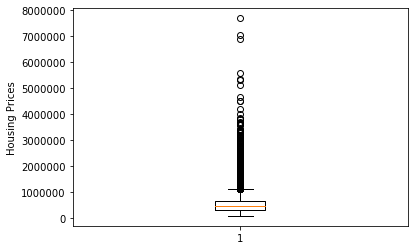

In [88]:
plt.boxplot(df['price'])
plt.ylabel('Housing Prices')

In [89]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [90]:
df['price'].mean()+ 2*df['price'].std()

1275032.8537083685

In [91]:
newdf= df.copy()

In [92]:
newdf.loc[newdf['bedrooms'] <= 6].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153500e+04,2.153500e+04,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000,19164.000000,21472.000000,21535.000000,21535.000000,21535.000000,21535.000000,17707.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000
mean,4.581314e+09,5.390889e+05,3.359786,2.111400,2075.221779,1.509742e+04,1.493360,0.007618,0.233420,3.409705,7.656280,1785.243836,1971.039053,83.185012,98077.929557,47.559926,-122.213864,1985.835663,12759.793220
std,2.876958e+09,3.652086e+05,0.875090,0.762291,909.693683,4.142101e+04,0.539494,0.086953,0.765083,0.650431,1.171862,823.245932,29.359903,398.906548,53.523854,0.138642,0.140803,684.596314,27274.117437
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000
75%,7.312150e+09,6.430000e+05,4.000000,2.500000,2540.000000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000
max,9.900000e+09,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [93]:
newdf= newdf.loc[newdf['bedrooms'] <=6]

In [94]:
newdf.loc[newdf['bathrooms'] <= 6].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152800e+04,2.152800e+04,21528.000000,21528.000000,21528.000000,2.152800e+04,21528.000000,19158.000000,21465.000000,21528.000000,21528.000000,21528.000000,21528.000000,17703.000000,21528.000000,21528.000000,21528.000000,21528.000000,21528.000000
mean,4.581447e+09,5.379232e+05,3.359114,2.109857,2073.025873,1.508845e+04,1.493218,0.007569,0.232798,3.409792,7.654822,1783.610925,1971.035349,82.978083,98077.933250,47.559911,-122.213871,1985.340533,12753.750139
std,2.876924e+09,3.572207e+05,0.874391,0.757500,901.088570,4.141872e+04,0.539472,0.086670,0.763672,0.650488,1.169159,817.893845,29.357943,398.431053,53.523389,0.138658,0.140806,683.963527,27272.888214
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.614500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000
75%,7.312200e+09,6.421125e+05,4.000000,2.500000,2540.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2208.500000,1997.000000,0.000000,98118.000000,47.678025,-122.125000,2360.000000,10080.000000
max,9.900000e+09,7.060000e+06,6.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
newdf= newdf.loc[newdf['bathrooms'] <=6]

In [96]:
newdf.loc[newdf['floors'] <= 3].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152200e+04,2.152200e+04,21522.000000,21522.00000,21522.000000,2.152200e+04,21522.000000,19153.000000,21459.000000,21522.000000,21522.000000,21522.000000,21522.000000,17698.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000
mean,4.581819e+09,5.379304e+05,3.359307,2.10969,2073.168432,1.509229e+04,1.492659,0.007571,0.232769,3.409906,7.654725,1783.672800,1971.025834,83.001526,98077.925286,47.559888,-122.213837,1985.499535,12756.939457
std,2.876942e+09,3.572695e+05,0.874401,0.75753,901.168550,4.142385e+04,0.538506,0.086682,0.763676,0.650543,1.169308,817.993765,29.356449,398.484892,53.528649,0.138669,0.140809,683.988799,27276.020487
min,1.000102e+06,7.800000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.210000e+05,3.000000,1.75000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.25000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000
75%,7.312200e+09,6.427575e+05,4.000000,2.50000,2540.000000,1.066075e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000
max,9.900000e+09,7.060000e+06,6.000000,6.00000,10040.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,7880.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [97]:
newdf= newdf.loc[newdf['floors'] <=3]

In [98]:
newdf.loc[newdf['price']<= 1275032.85].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.069900e+04,2.069900e+04,20699.000000,20699.000000,20699.000000,2.069900e+04,20699.000000,18407.000000,20640.000000,20699.000000,20699.000000,20699.000000,20699.000000,17024.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000
mean,4.597582e+09,4.872848e+05,3.330016,2.061645,1994.646553,1.469643e+04,1.479443,0.003368,0.184835,3.407024,7.559785,1723.435915,1970.879463,75.602972,98078.420165,47.557622,-122.213184,1938.292768,12508.407266
std,2.877604e+09,2.242774e+05,0.863768,0.712894,794.251412,4.009183e+04,0.536092,0.057941,0.667573,0.647502,1.063878,742.330869,29.200153,381.004614,53.349647,0.140463,0.142053,632.342070,26536.588252
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.126079e+09,3.162375e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,0.000000,98033.000000,47.462400,-122.330000,1470.000000,5072.500000
50%,3.905040e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.520000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1974.000000,0.000000,98065.000000,47.567800,-122.231000,1810.000000,7560.000000
75%,7.336700e+09,6.125000e+05,4.000000,2.500000,2460.000000,1.039550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,1996.000000,0.000000,98118.000000,47.679500,-122.123000,2300.000000,9928.000000
max,9.900000e+09,1.270000e+06,6.000000,6.000000,7350.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,12.000000,7320.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [99]:
newdf= newdf.loc[newdf['price']<= 1275032.85]

In [100]:
newdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [101]:
newdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.069900e+04,2.069900e+04,20699.000000,20699.000000,20699.000000,2.069900e+04,20699.000000,18407.000000,20640.000000,20699.000000,20699.000000,20699.000000,20699.000000,17024.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000
mean,4.597582e+09,4.872848e+05,3.330016,2.061645,1994.646553,1.469643e+04,1.479443,0.003368,0.184835,3.407024,7.559785,1723.435915,1970.879463,75.602972,98078.420165,47.557622,-122.213184,1938.292768,12508.407266
std,2.877604e+09,2.242774e+05,0.863768,0.712894,794.251412,4.009183e+04,0.536092,0.057941,0.667573,0.647502,1.063878,742.330869,29.200153,381.004614,53.349647,0.140463,0.142053,632.342070,26536.588252
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.126079e+09,3.162375e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,0.000000,98033.000000,47.462400,-122.330000,1470.000000,5072.500000
50%,3.905040e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.520000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1974.000000,0.000000,98065.000000,47.567800,-122.231000,1810.000000,7560.000000
75%,7.336700e+09,6.125000e+05,4.000000,2.500000,2460.000000,1.039550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,1996.000000,0.000000,98118.000000,47.679500,-122.123000,2300.000000,9928.000000
max,9.900000e+09,1.270000e+06,6.000000,6.000000,7350.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,12.000000,7320.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [102]:
X3= newdf[features]
y3= newdf['price']

In [103]:
X3_train, X3_test, y3_train, y3_test= train_test_split(X3, y3, test_size= 0.25, random_state= 42)

In [104]:
scaler= StandardScaler()
scaler.fit(X3_train)
X3_train_scaled= scaler.transform(X3_train)
X3_test_scaled= scaler.transform(X3_test)

In [105]:
lr3= LinearRegression()
lr3.fit(X3_train_scaled, y3_train)

LinearRegression()

In [106]:
train3_preds= lr3.predict(X3_train_scaled)
test3_preds= lr3.predict(X3_test_scaled)

In [107]:
r2_score(y3_train, train3_preds)

0.42048269724993526

In [108]:
r2_score(y3_test, test3_preds)

0.4226130000068893

In [109]:
print(f"MSE train: {mean_squared_error(y3_train, train3_preds)}")

MSE train: 29225929902.623684


In [110]:
print(f"MSE test: {mean_squared_error(y3_test, test3_preds)}")

MSE test: 28801910273.13777


In [111]:
print(f"RMSE train: {np.sqrt(mean_squared_error(y3_train, train3_preds))}")

RMSE train: 170955.9297088688


In [112]:
print(f"RMSE test: {np.sqrt(mean_squared_error(y3_test, test3_preds))}")

RMSE test: 169711.25558765326


In [113]:
dict(zip(X3.columns, lr3.coef_))

{'sqft_living': 154055.42683945684,
 'bedrooms': -25333.12985201686,
 'bathrooms': -107.35772090786695,
 'floors': 13827.043392176092}

In [114]:
lr3.intercept_

486201.7387915486

In [115]:
newdf['price'].describe()

count    2.069900e+04
mean     4.872848e+05
std      2.242774e+05
min      7.800000e+04
25%      3.162375e+05
50%      4.400000e+05
75%      6.125000e+05
max      1.270000e+06
Name: price, dtype: float64

In [116]:
residuals_train3= y3_train- train3_preds
residuals_test3= y3_test- test3_preds

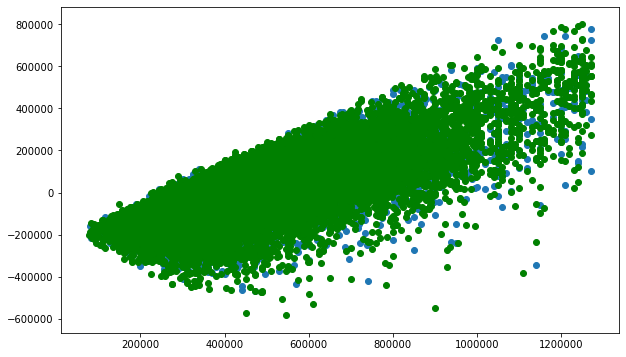

In [117]:
plt.figure(figsize= (10,6))
plt.scatter(y3_test, residuals_test3)
plt.scatter(y3_train, residuals_train3, color= 'green')

The second model had linear coefficients for my features of 154055.42 for square footage, -25333.12 for bedrooms, -107.35 for bathrooms, and 13827.04 for floors. These coefficients exhibit that square footage still had the strongest positive relationship with home sale price. Number of bedrooms still had a negative relationship with home sale price.  Number of bathrooms had a minor negative relationship with home sale price. Number of floors had a minor positive relationship with home sale price. The second model test set had a root mean squared error value of 169711.26, which means my model could be about 169711.26 dollars off of my target home selling price. My residuals plot of the second model shows the test and training values for my model are about the same.

My second model reveals that the housing prices still vary dramatically. There are areas where housing prices are still skewed as the pairplot below displays:

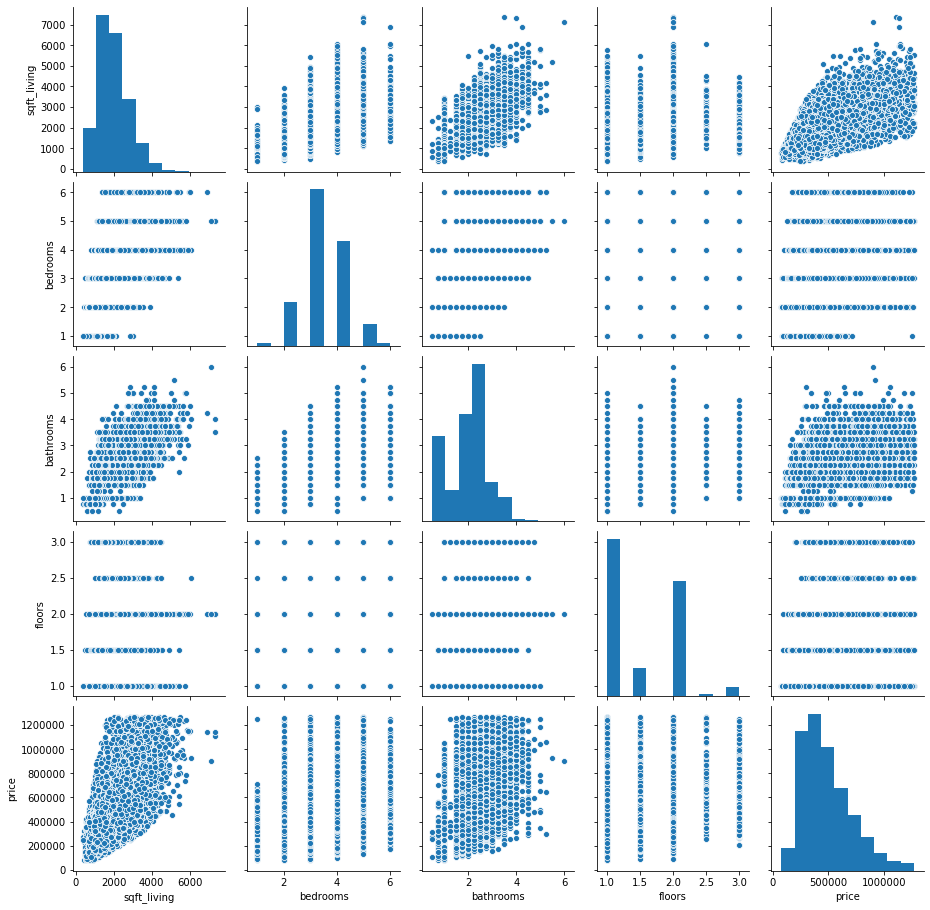

In [118]:
sns.pairplot(newdf[[*features, 'price']])

I attempted a third model using a log transforming of housing price to determine if my model house prices could fit better with my features because home selling price varies so dramatically. My third model got about the same results as my second model. I disregarded the model to stick with my first two models. Other factors may influence the changes in house selling price that are yet to be determined.

## Conclusions

- Create homes with more square foot living space, but not necessarily bedrooms.

- Allow more variance with number of bathrooms and number of floors in homes because the relationship of these variables change less with relation to home sale price.

## Recommendations for Further Analysis

- Create more regression models with different data cleaning tactics on the number of bedrooms to find a positive correlation value for number of bedrooms in relation to home selling price.

- Include more specified square footage columns from original King County House Sales dataset in new models to attain other square footage values for comparison with home selling price. Look at square footage of the lot where it is different from square footage of a home. Procure information about square footage living of a house with or without a basement.

- View locations of homes for sale and determine if that influences selling price.